1. Setup envivronment

In [69]:
## This is a Juptyer notebook for the Kaggle Project: Abalone Regresssion

%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn
%pip install scipy
## Import libaries

## Data analysis and wrangling
import numpy as np
import pandas as pd
import random as rnd

## Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

#ML Methods
from sklearn.model_selection import train_test_split
from scipy.stats import boxcox

#Palette
palette = ['#328ca9', '#0e6ea9', '#2c4ea3', '#193882', '#102446']

Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


2. Problem identification 

Problem statement: 

This is one of the 2024 playground competitions on Kaggle. The major goal of the project is the develop a model for predicting the age of abalone from different physical measurements.

Performance indicator:
The model performanc will be checked by the Root Mean Squared Logarithmic Error between the actual and predicted "Rings".

Reference:
Walter Reade, Ashley Chow. (2024). Regression with an Abalone Dataset. Kaggle. https://kaggle.com/competitions/playground-series-s4e4

3. Reading data 

In [70]:
## Reading data
train_df=pd.read_csv('C:\\Users\\Kai Qi Yan\\OneDrive\\文档\\GitHub\\Remote_Abalone_Regression\\Input\\train.csv')#
test_df=pd.read_csv('C:\\Users\\Kai Qi Yan\\OneDrive\\文档\\GitHub\\Remote_Abalone_Regression\\Input\\test.csv')

4. Basic data checks

4.1 The number of features

In [71]:
# Number of columns and rows in the dataset
print(train_df.columns.values)
print(train_df.shape)

['id' 'Sex' 'Length' 'Diameter' 'Height' 'Whole weight' 'Whole weight.1'
 'Whole weight.2' 'Shell weight' 'Rings']
(90615, 10)


There are 10 columns in the data. 
The Ring is the target, id is the number of entries and others are features.
From the https://archive.ics.uci.edu/dataset/1/abalone, we obtained the following details of the features.
1. Sex: M,F,I(infant)
2. Length: longest shell distance in [mm]
3. Diameter: distance perpendicular to Length in [mm]
4. Height: the height with meat in the shell [mm]
5. Whole weight: the weight of the whole abalone(shell+meat) [g]
6. Shucked weight (named as Whole weight.1): the weight of meat [g]
7. Viscera_weight (named as Whole weight.2): the weight of gut after bleeding [g]
8. Shell weight = the weight of dried shell [g]
9. Rings = +1.5 gives the age in years (Done by cutting the shell through the cone, staining it, and counting the number of rings through a microscope)

In the training dataset, there are 90515 entries of data.

In [72]:
train_df.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


In [73]:
test_df.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
0,90615,M,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005
1,90616,M,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750
2,90617,M,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405
3,90618,M,0.570,0.490,0.145,0.8740,0.3525,0.1865,0.2350
4,90619,I,0.415,0.325,0.110,0.3580,0.1575,0.0670,0.1050


4.2 Data type of the features

In [74]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90615 entries, 0 to 90614
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              90615 non-null  int64  
 1   Sex             90615 non-null  object 
 2   Length          90615 non-null  float64
 3   Diameter        90615 non-null  float64
 4   Height          90615 non-null  float64
 5   Whole weight    90615 non-null  float64
 6   Whole weight.1  90615 non-null  float64
 7   Whole weight.2  90615 non-null  float64
 8   Shell weight    90615 non-null  float64
 9   Rings           90615 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 6.9+ MB


In [75]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60411 entries, 0 to 60410
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              60411 non-null  int64  
 1   Sex             60411 non-null  object 
 2   Length          60411 non-null  float64
 3   Diameter        60411 non-null  float64
 4   Height          60411 non-null  float64
 5   Whole weight    60411 non-null  float64
 6   Whole weight.1  60411 non-null  float64
 7   Whole weight.2  60411 non-null  float64
 8   Shell weight    60411 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 4.1+ MB


There are 1 categorial input: Sex and others are numerical. While the target "Rings" is an integer, the inputs are all floats.

4.3 Checking of missing entries and duplicates

4.3.1 Missing entries

In [76]:
print("TrainData\n\n",train_df.isnull().sum())
print("_"*40)
print("TestData\n\n",test_df.isnull().sum())

TrainData

 id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Whole weight.1    0
Whole weight.2    0
Shell weight      0
Rings             0
dtype: int64
________________________________________
TestData

 id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Whole weight.1    0
Whole weight.2    0
Shell weight      0
dtype: int64


There are no missing entries (NaN) in both datasets.

4.3.2 Duplicates

In [77]:
print("TrainData","\n",train_df.duplicated().sum())
print("_"*40)
print("TestData","\n",test_df.duplicated().sum())

TrainData 
 0
________________________________________
TestData 
 0


There are no duplicates in both datasets.

5 Feature engineering

5.1. Explore new features
The following new features are included in the datasets:

1. Aspect ratio: Length/Distance. This is a shape desriptor for the abalone, which roughly represent the roundness. 

2. Ellipsoid Volume: 4/3*pi*(Length/2)*(Distance/2)*(Height/2)

3. Meat/Whole abalone ratio:

4. Gut/Meat Ratio:



ref:https://imagej.net/ij/docs/guide/146-30.html#toc-Subsection-30.7


In [78]:
def FeatureEngineering(df):
    #1 Aspect Ratio
    df['Aspect ratio'] = df['Length']/df['Diameter']

    #2 Ellipsoid Volume
    df['Volume'] = (4/3)*np.pi*(df['Length']/2)*(df['Diameter']/2)*df['Height']/2

    #3 Meat/Abalone Ratio
    df['Meat ratio'] = df['Whole weight.1']/df['Whole weight']

    #4 Gut/Meat Ratio
    df['Gut meat ratio'] = df['Whole weight.2']/df['Whole weight.1']

    #return data
    return df

In [79]:
#Add the new features to the data
train_df=FeatureEngineering(train_df)
test_df=FeatureEngineering(test_df)

In [80]:
# Drop unnecessary features
train_df.drop(['id'], axis=1, inplace=True)
test_df.drop(['id'], axis=1, inplace=True)

5.2 The distribution of the features (Univariate analysis)

5.2.1 Numerical features

a Descriptive statistics of numerical features

In [81]:
# Descriptive statistics of numerical features
train_df.describe()

,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings,Aspect ratio,Volume,Meat ratio,Gut meat ratio
count,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000
mean,0.517098,0.401679,0.135464,0.789035,0.340778,0.169422,0.225898,9.696794,1.295142,0.017200,0.430878,0.508287
std,0.118217,0.098026,0.038008,0.457671,0.204428,0.100909,0.130203,3.176221,0.059678,0.010298,0.078802,0.104979
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000,0.517241,0.000000,0.051724,0.012987
25%,0.445000,0.345000,0.110000,0.419000,0.177500,0.086500,0.120000,8.000000,1.262136,0.008859,0.397008,0.443974
50%,0.545000,0.425000,0.140000,0.799500,0.330000,0.166000,0.225000,9.000000,1.288889,0.016933,0.431461,0.496644
75%,0.600000,0.470000,0.160000,1.067500,0.463000,0.232500,0.305000,11.000000,1.321839,0.023437,0.464579,0.559288
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000,3.923077,0.155756,4.782609,5.500000


Note that in Height, the minimum value is 0, indicating a missing value as the height of an abalone can never be 0.
Looking at the maximum/minimum and the mean values, the large differences between the them may indicate the features are either skewed or with outliers. 
This will be check again in the distribution plot again in the later section.

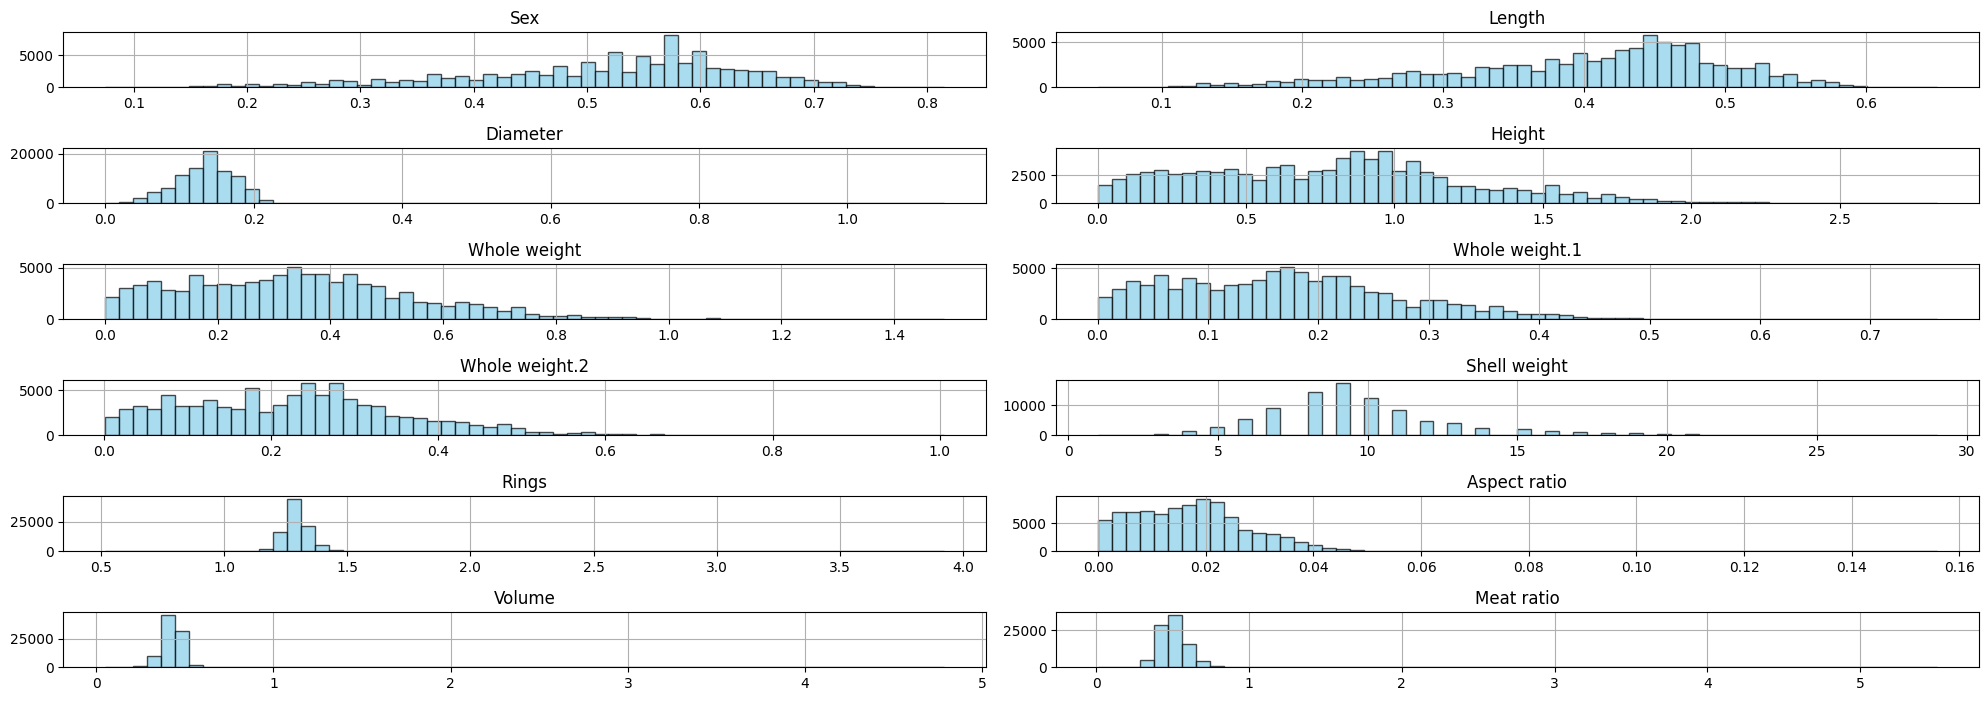

In [82]:
# plot the distribution of the feature variables
# Plot histograms of each variable
axes = train_df.hist(bins=60, figsize=(20,15), color='skyblue', edgecolor='black', alpha=0.7, layout=(len(train_df.columns),2))

# Add labels
for ax, column in zip(axes.flatten(), train_df.columns):
    ax.set_title(column)

# Improve layout
plt.tight_layout()
plt.show()

##### why the last column is missing?

From the above plots, it is observed that most of the numerical features are skewed. Also, the magnitude of the Shell weight is much larger than the other variables. Noramlization and standardization maybe required.

5.2.1b Outlier detection

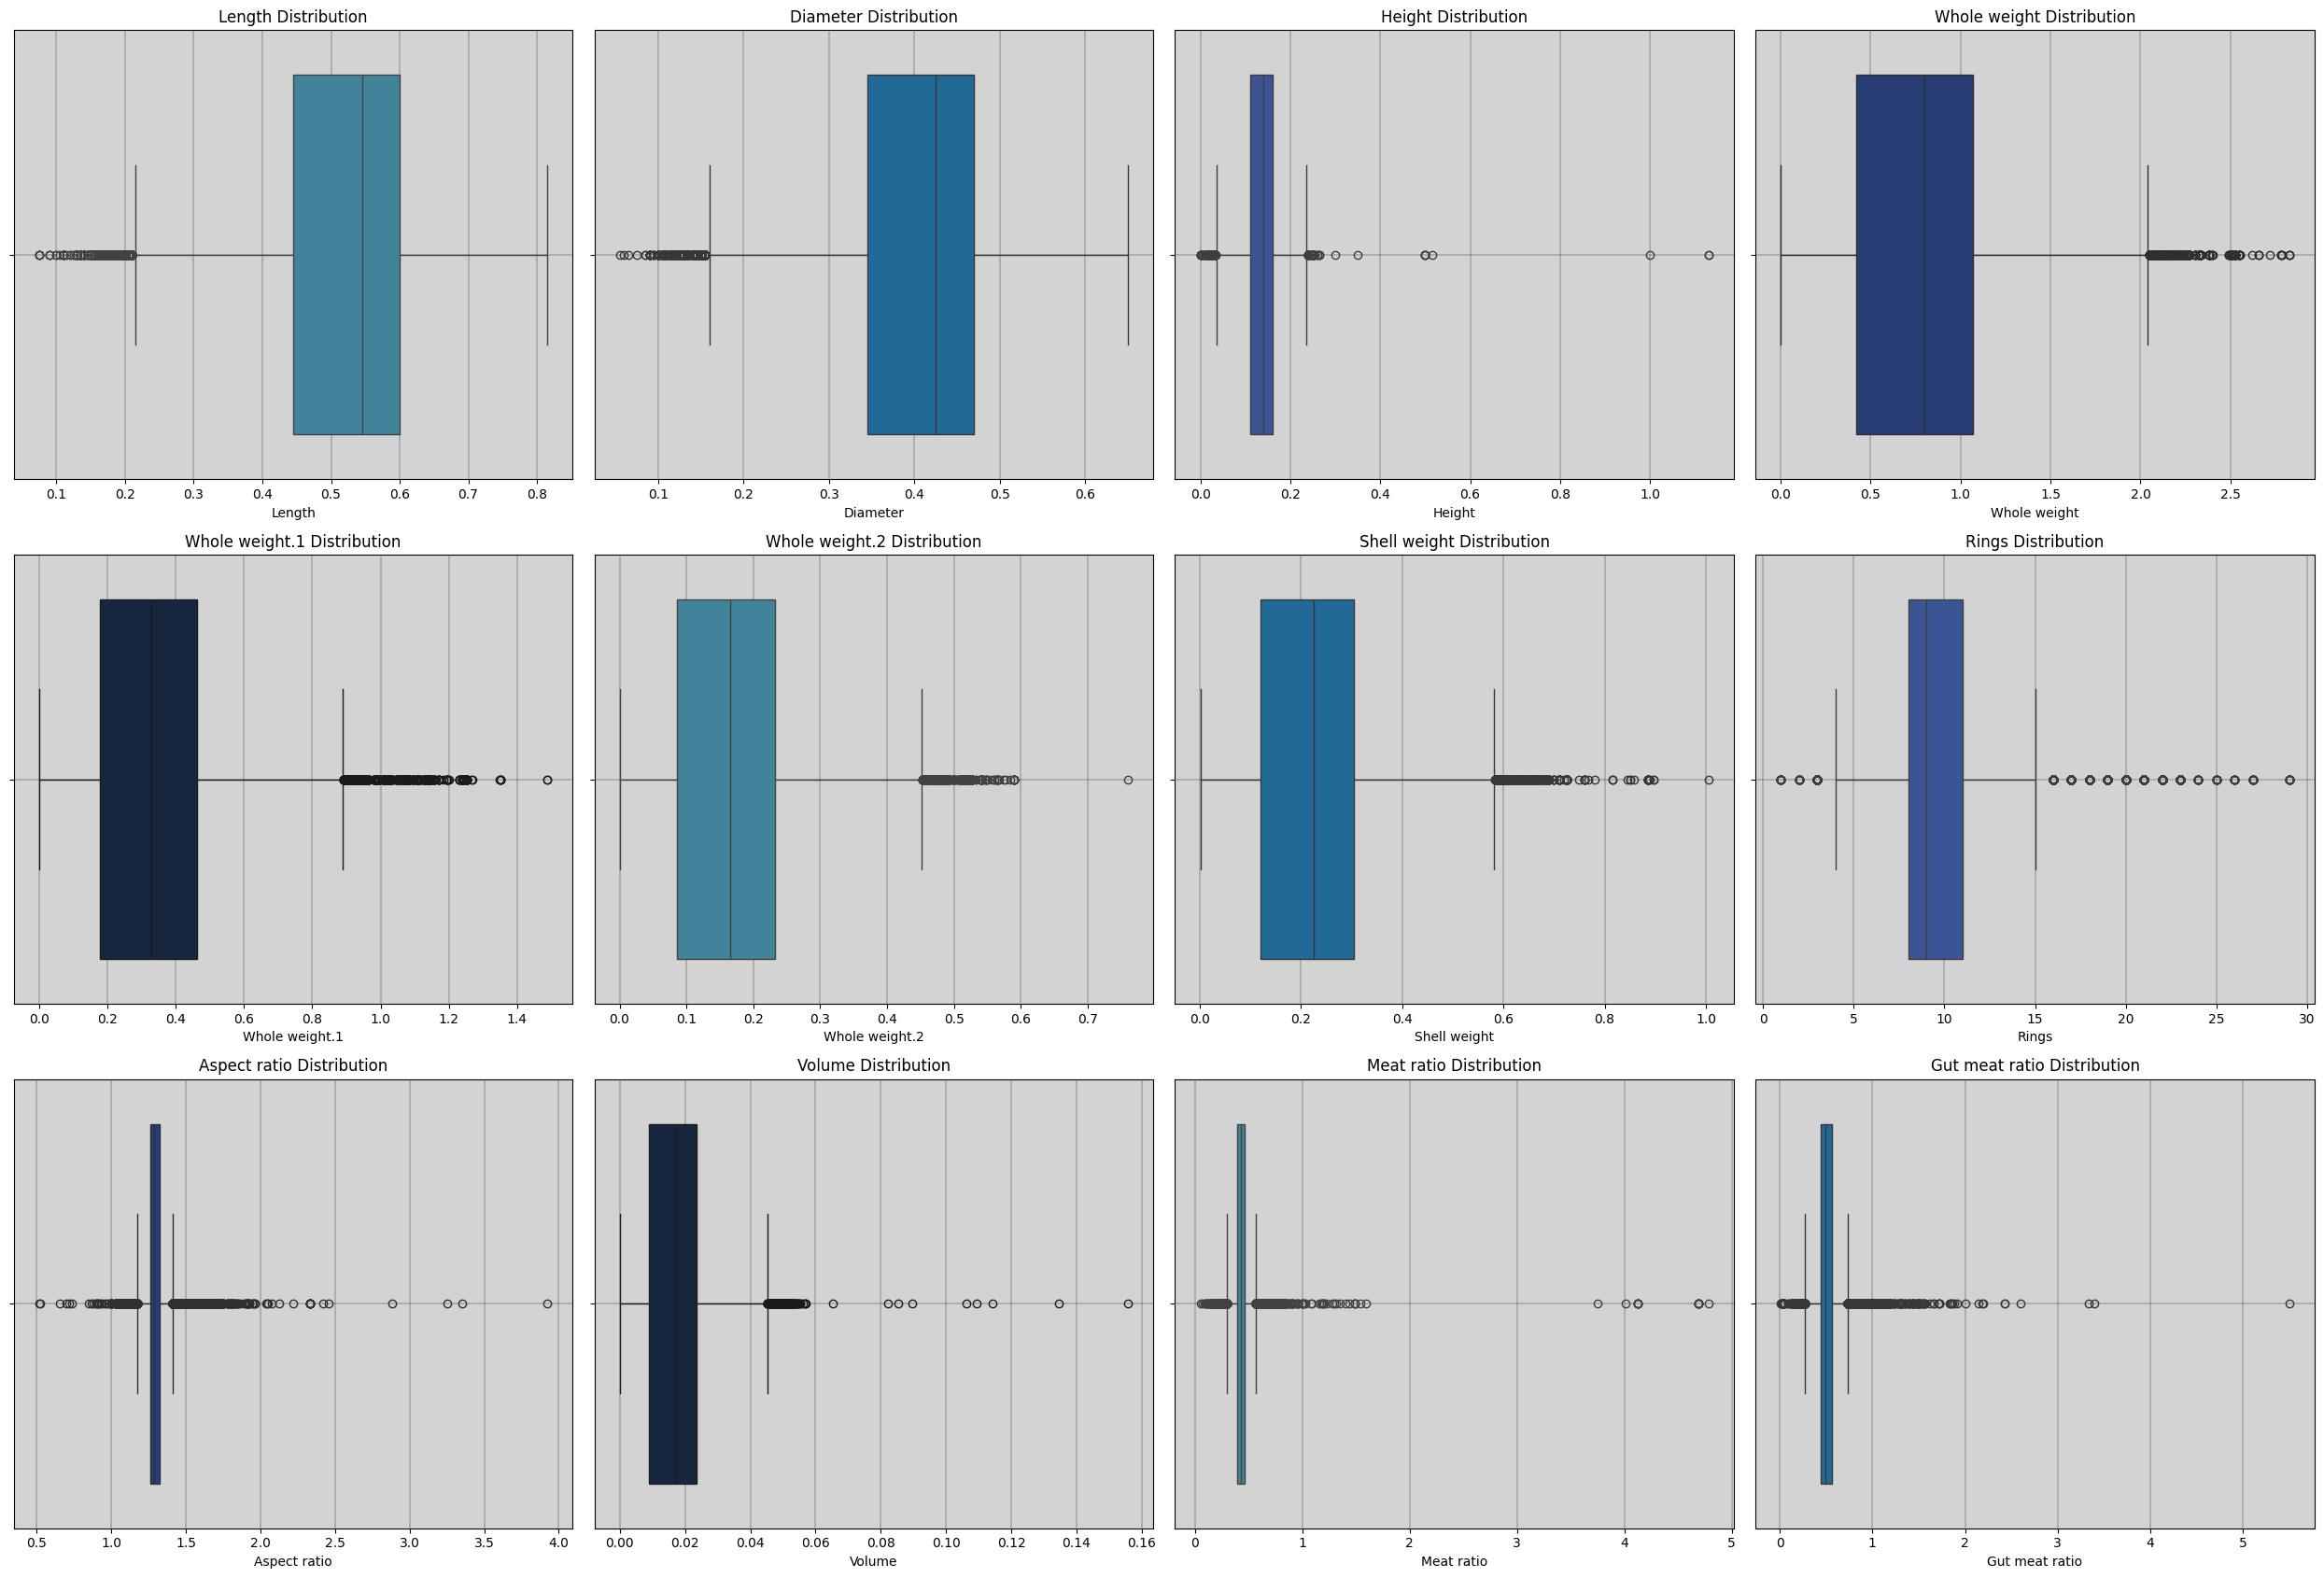

In [83]:
#define a BOX plot function

def MultiBoxplot(df,num_cols,f_cols=4,color=palette):
    f_rows = np.ceil(len(num_cols)/f_cols).astype(int)
    fig, axes = plt.subplots(f_rows, f_cols, figsize=(25, 17))
    axes = axes.flatten()
    for i, j in enumerate(num_cols):
        sns.boxplot(x=j, data=df, ax=axes[i],color=color[i%5])
        axes[i].set_title(f'{j} Distribution')
        axes[i].set_facecolor('lightgrey')
        axes[i].grid(color='black', linestyle='-', linewidth=0.25)
        plt.tight_layout()

# separate the numerical and categorical columns
num_cols = train_df._get_numeric_data().columns
cat_cols = list(set(train_df.columns) - set(num_cols))

MultiBoxplot(df=train_df,num_cols=num_cols)

Identify the outliers
-> try write a python code for showcasing the outliers in each feature, figure out reasons for 
-> try add categorial feature that indicating there are outliers in the feature by ordinal encoding them as(smaller than minimum:-1, larger than maximum:+1)
    -> capping the outliers as min/max
-> show the total count of outliers in each feature (which type of outliers)

    https://medium.com/analytics-vidhya/how-to-handle-outliers-in-machine-learning-5d8105c708e5

    https://llego.dev/posts/outlier-detection-handling-python-guide/

Breifly examine the outliers from each of the categories

Should the outliers being determined by their sex? 

In [84]:
#Outlier handling

def OutlierHandling(df):
    # Loop through each numerical column
    for col in num_cols:
        # Calculate the first quartile
        Q1 = df[col].quantile(0.25)
        # Calculate the third quartile
        Q3 = df[col].quantile(0.75)
        # Calculate the interquartile range
        IQR = Q3 - Q1
        # Calculate the lower bound
        lower_bound = Q1 - 1.5 * IQR
        # Calculate the upper bound
        upper_bound = Q3 + 1.5 * IQR
        # Filter the outliers
        #df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

        # Replace the outliers by the lower and upper bounds
        df.loc[df[col] < lower_bound, col] = lower_bound
        df.loc[df[col] > upper_bound, col] = upper_bound

        # Set new features indicating the presence of outliers
        df[col + '_outlier'] = 0
        df.loc[df[col] < lower_bound, col + '_outlier'] = -1
        df.loc[df[col] > upper_bound, col + '_outlier'] = 1
    return df

# Remove outliers from the training data
train_wo_O = OutlierHandling(train_df)

train_wo_O

C:\Users\Kai Qi Yan\AppData\Local\Temp\ipykernel_11780\176719897.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '3.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[col] < lower_bound, col] = lower_bound


,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings,Aspect ratio,...,Height_outlier,Whole weight_outlier,Whole weight.1_outlier,Whole weight.2_outlier,Shell weight_outlier,Rings_outlier,Aspect ratio_outlier,Volume_outlier,Meat ratio_outlier,Gut meat ratio_outlier
0,F,0.5500,0.4300,0.150,0.7715,0.3285,0.1465,0.2400,11.0,1.279070,...,0,0,0,0,0,0,0,0,0,0
1,F,0.6300,0.4900,0.145,1.1300,0.4580,0.2765,0.3200,11.0,1.285714,...,0,0,0,0,0,0,0,0,0,0
2,I,0.2125,0.1575,0.035,0.0210,0.0055,0.0030,0.0050,6.0,1.411394,...,0,0,0,0,0,0,0,0,0,0
3,M,0.5950,0.4750,0.150,0.9145,0.3755,0.2055,0.2500,10.0,1.252632,...,0,0,0,0,0,0,0,0,0,0
4,I,0.5550,0.4250,0.130,0.7820,0.3695,0.1600,0.1975,9.0,1.305882,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90610,M,0.3350,0.2350,0.075,0.1585,0.0685,0.0370,0.0450,6.0,1.411394,...,0,0,0,0,0,0,0,0,0,0
90611,M,0.5550,0.4250,0.150,0.8790,0.3865,0.1815,0.2400,9.0,1.305882,...,0,0,0,0,0,0,0,0,0,0
90612,I,0.4350,0.3300,0.095,0.3215,0.1510,0.0785,0.0815,6.0,1.318182,...,0,0,0,0,0,0,0,0,0,0
90613,I,0.3450,0.2700,0.075,0.2000,0.0980,0.0490,0.0700,6.0,1.277778,...,0,0,0,0,0,0,0,0,0,0


The first handling method drops all the outliers, which results in dropping a great amount of data.

The second method 

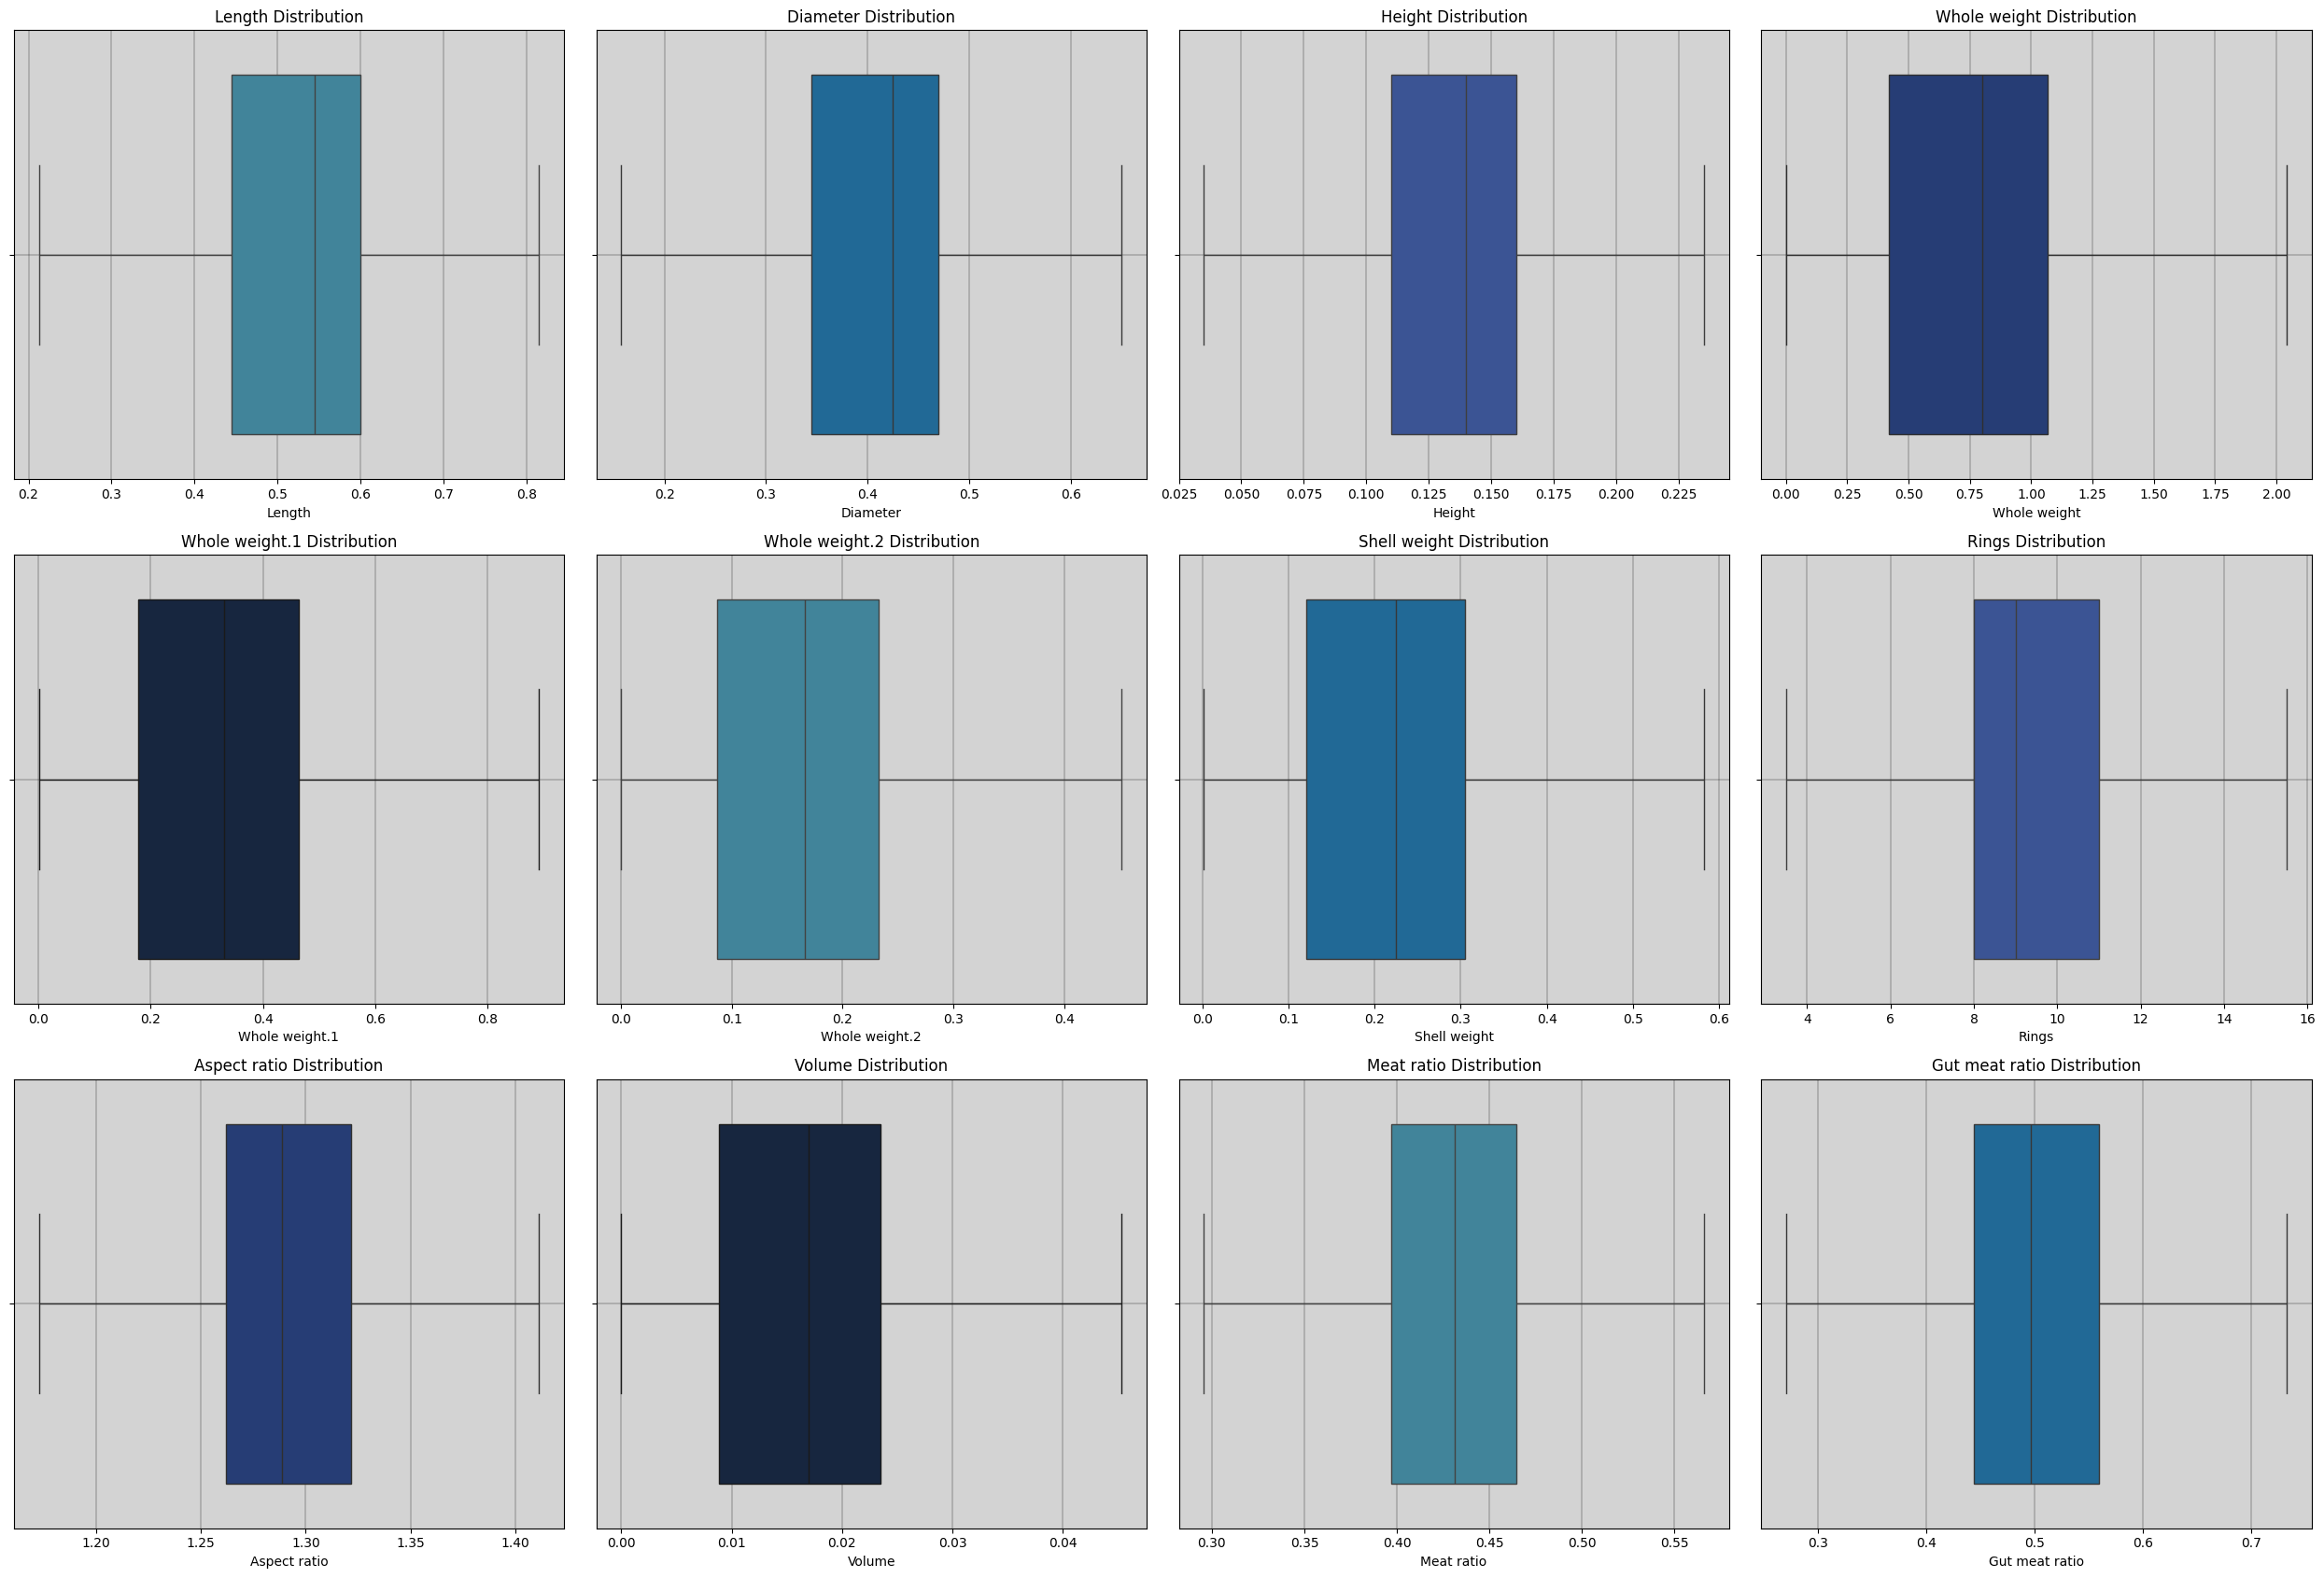

In [85]:
MultiBoxplot(df=train_wo_O,num_cols=num_cols)

5.2.2 Distribution of categorial features

In [86]:
# Descriptive statistics of categorical features
train_df.describe(include=['O'])

,Sex
count,90615
unique,3
top,I
freq,33093


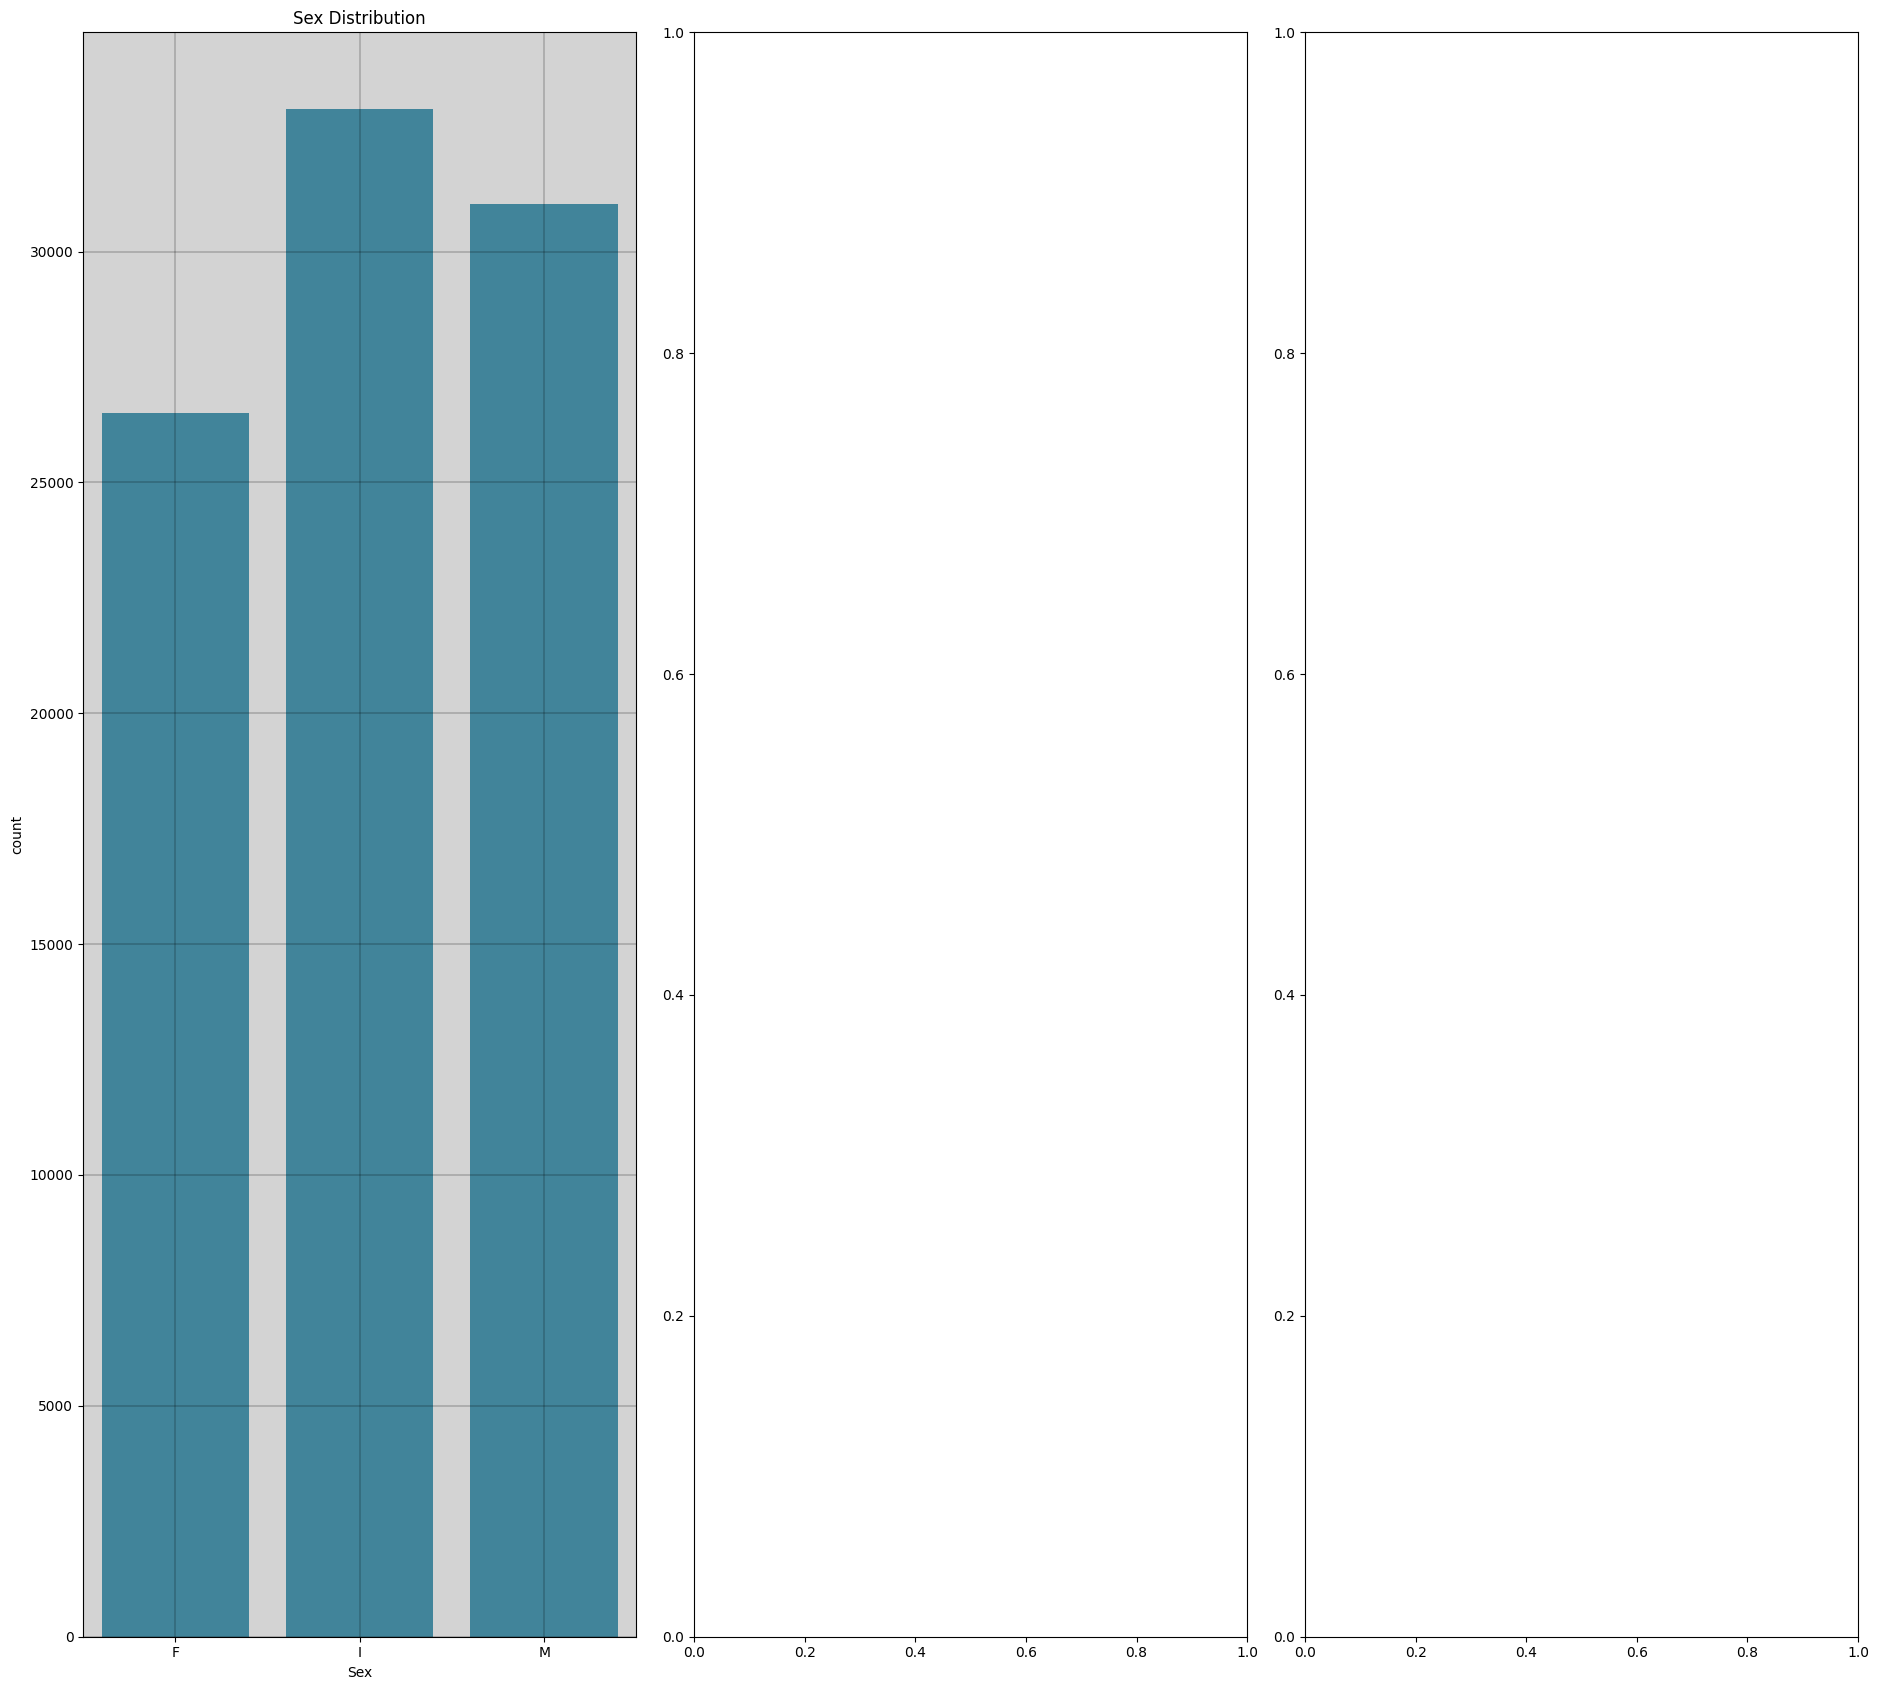

In [87]:
# Define a function to plot the distribution of categorical features

def MultiCountplot(df, cat_cols, f_cols=4, color=palette):
    f_rows = np.ceil(len(cat_cols)/f_cols).astype(int)
    fig, axes = plt.subplots(f_rows, f_cols, figsize=(25, 17))
    axes = axes.flatten()
    for i, j in enumerate(cat_cols):
        sns.countplot(x=j, data=df, ax=axes[i], color=color[i%5])
        axes[i].set_title(f'{j} Distribution')
        axes[i].set_facecolor('lightgrey')
        axes[i].grid(color='black', linestyle='-', linewidth=0.25)
        plt.tight_layout()

    # ignore the empty plots
    if len(cat_cols) % f_cols != 0:
        for i in range(len(cat_cols) % f_cols):
            fig.delaxes(axes[-1 - i])

# Plot the distribution of categorical features
MultiCountplot(df=train_df, cat_cols=cat_cols)

6 Bivariate analysis

6.1. Bivariate scatterplot with the target 

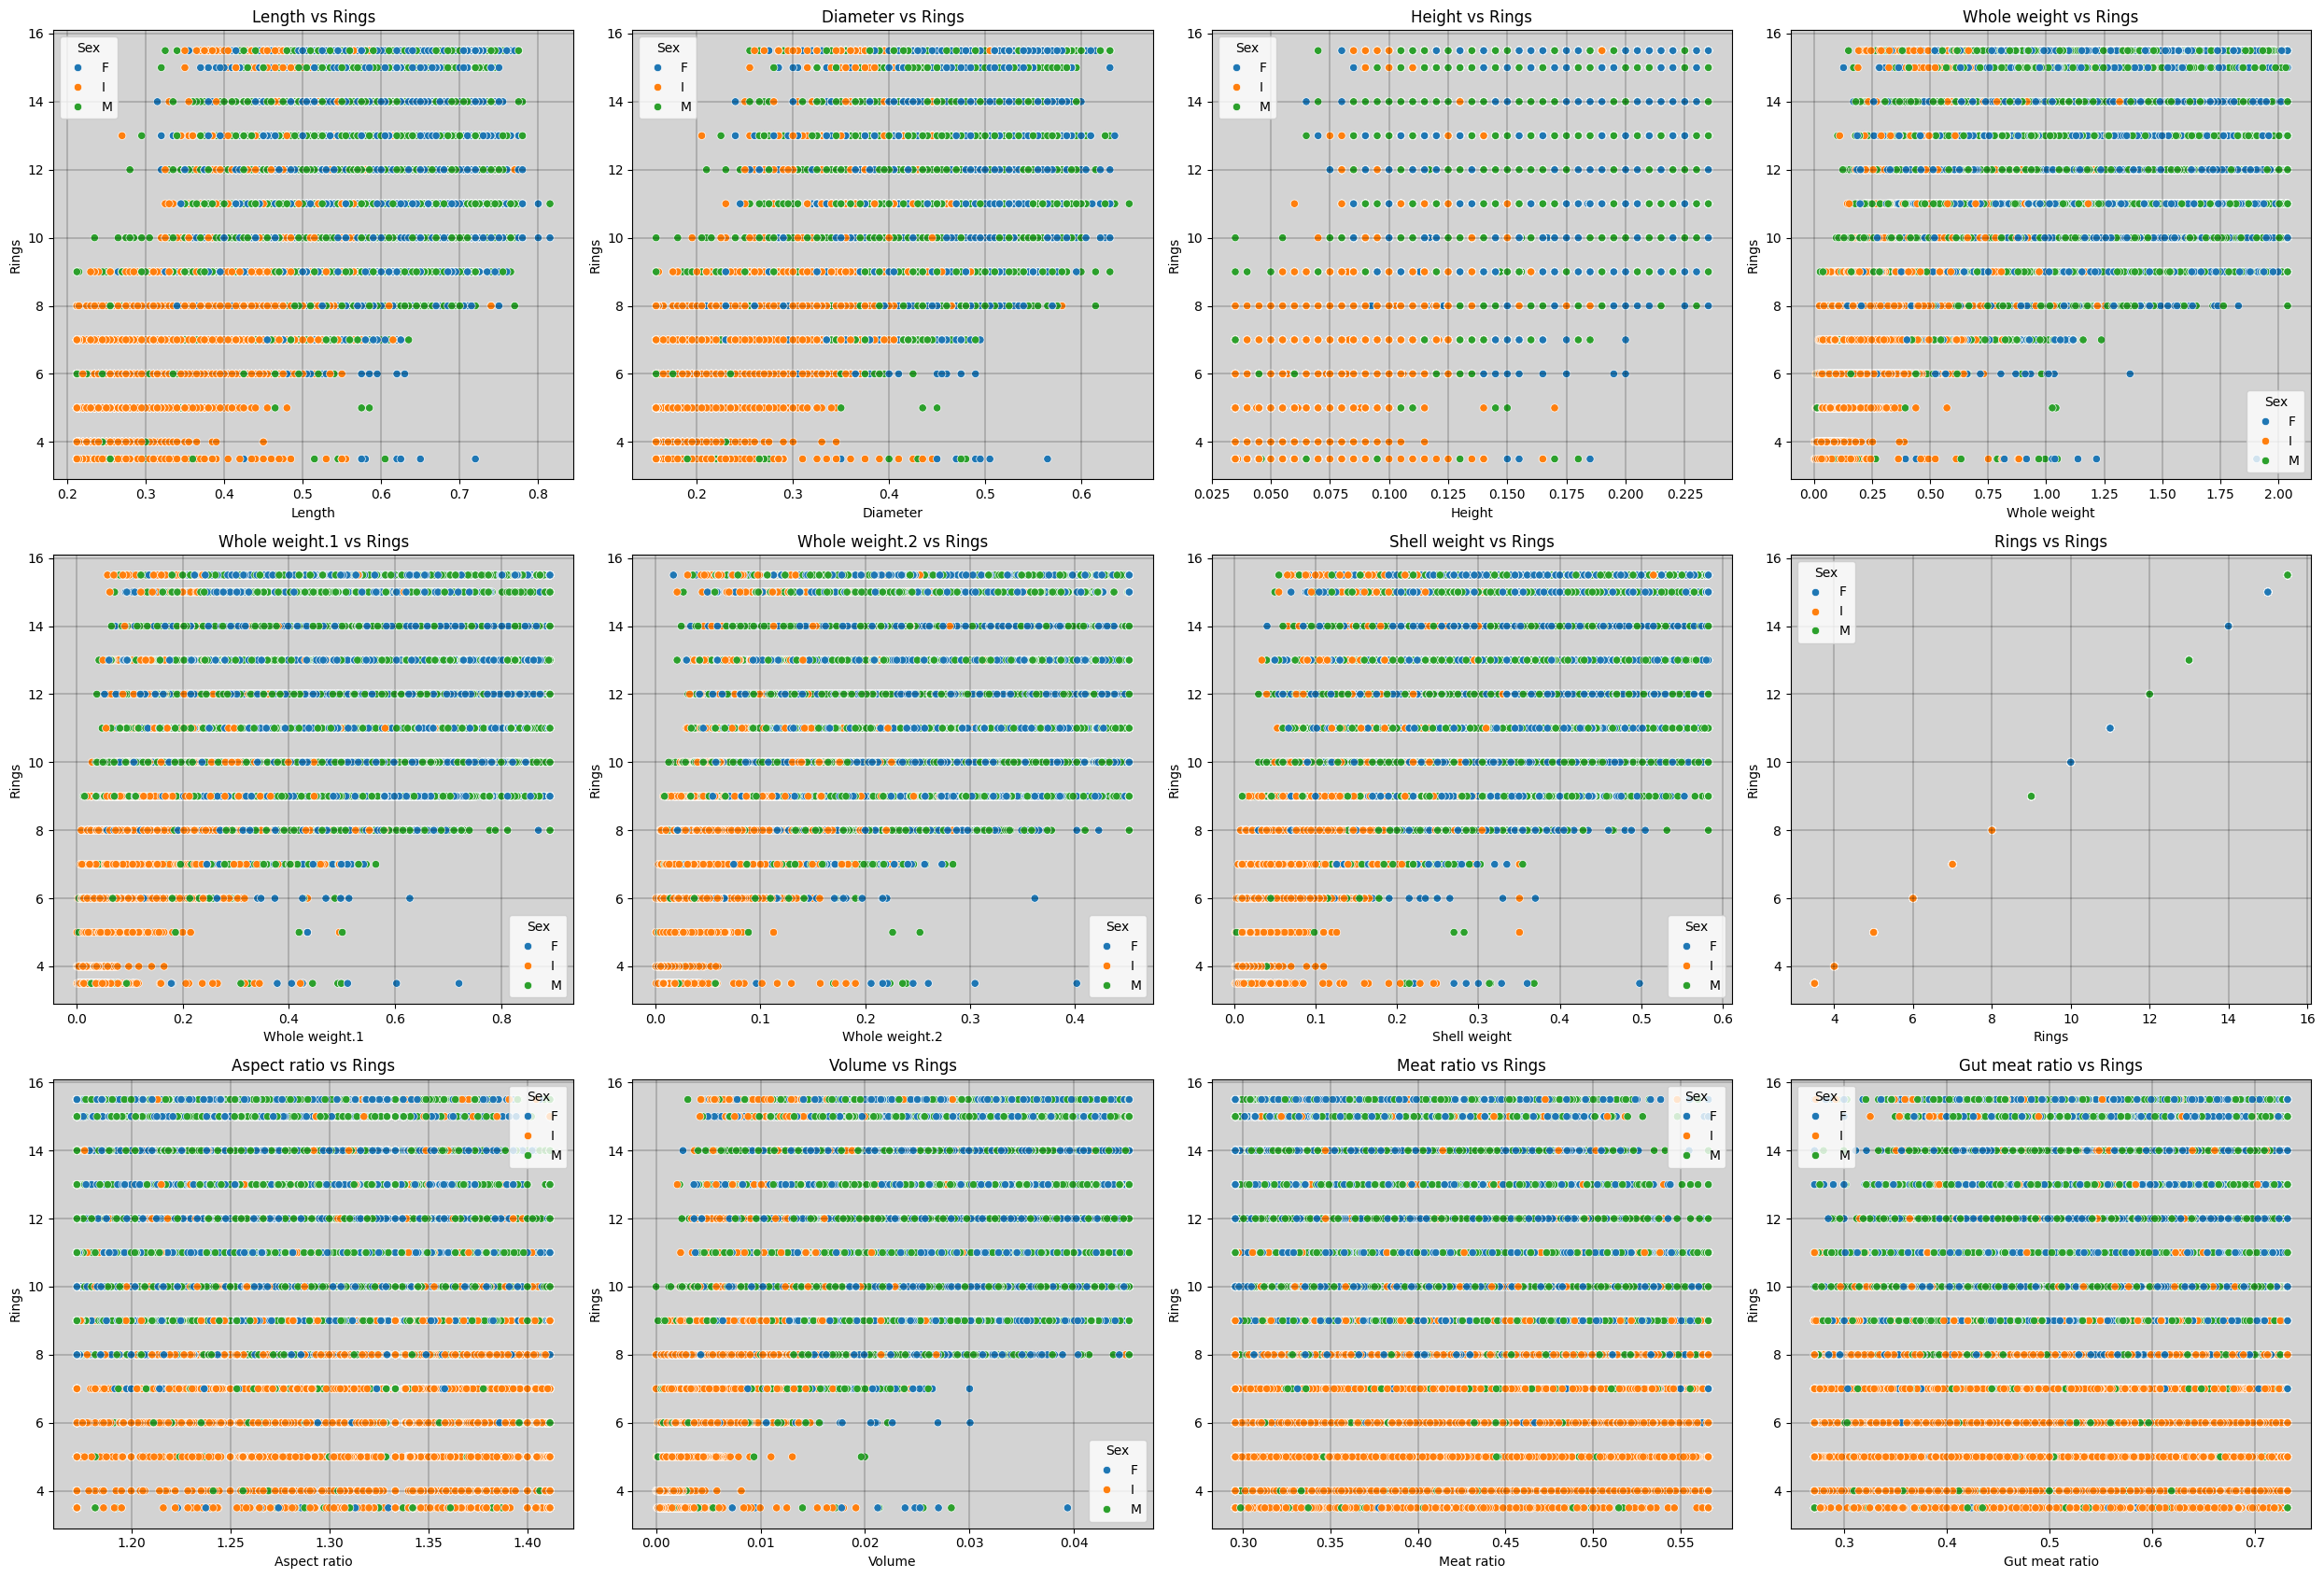

In [88]:
# Define a scatter plot function for numerical features
def MultiScatterplot(df, num_cols, target_col, f_cols=4, color=palette,hue='Sex'):
    f_rows = np.ceil(len(num_cols)/f_cols).astype(int)
    fig, axes = plt.subplots(f_rows, f_cols, figsize=(25, 17))
    axes = axes.flatten()
    for i, j in enumerate(num_cols):
        sns.scatterplot(x=j, y=target_col, data=df, ax=axes[i], color=color[i%5],hue=hue)
        axes[i].set_title(f'{j} vs {target_col}')
        axes[i].set_facecolor('lightgrey')
        axes[i].grid(color='black', linestyle='-', linewidth=0.25)
        plt.tight_layout()

    # ignore the empty plots
    if len(num_cols) % f_cols != 0:
        for i in range(len(num_cols) % f_cols):
            fig.delaxes(axes[-1 - i])

# Plot the scatter plot of numerical features
MultiScatterplot(df=train_df, num_cols=num_cols, target_col='Rings',hue='Sex')




#Summary of observation

<Axes: xlabel='Volume', ylabel='Meat ratio'>

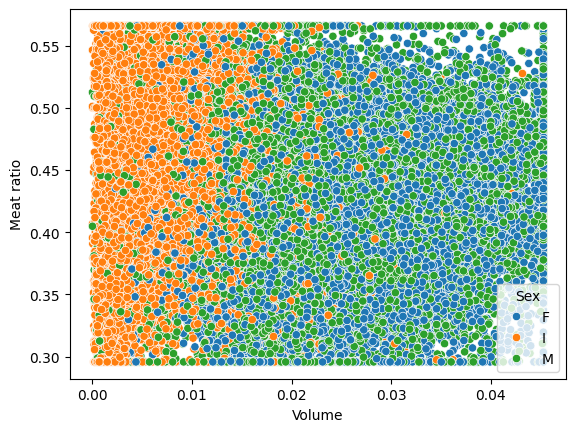

In [89]:
sns.scatterplot(x=train_df.Volume, y=train_df['Meat ratio'], hue=train_df.Sex)

In [90]:
'''

# Define a swarm plot function for categorical features
def MultiSwarmplot(df, cat_cols, target_col, f_cols=4, color=palette):
    f_rows = np.ceil(len(cat_cols)/f_cols).astype(int)
    fig, axes = plt.subplots(f_rows, f_cols, figsize=(25, 17))
    axes = axes.flatten()
    for i, j in enumerate(cat_cols):
        sns.swarmplot(x=j, y=target_col, data=df, ax=axes[i], color=color[i%5])
        axes[i].set_title(f'{j} vs {target_col}')
        axes[i].set_facecolor('lightgrey')
        axes[i].grid(color='black', linestyle='-', linewidth=0.25)
        plt.tight_layout()

    # ignore the empty plots
    if len(cat_cols) % f_cols != 0:
        for i in range(len(cat_cols) % f_cols):
            fig.delaxes(axes[-1 - i])

# Plot the swarm plot of categorical features
MultiSwarmplot(df=train_df, cat_cols=cat_cols, target_col='Rings')
'''

"\n\n# Define a swarm plot function for categorical features\ndef MultiSwarmplot(df, cat_cols, target_col, f_cols=4, color=palette):\n    f_rows = np.ceil(len(cat_cols)/f_cols).astype(int)\n    fig, axes = plt.subplots(f_rows, f_cols, figsize=(25, 17))\n    axes = axes.flatten()\n    for i, j in enumerate(cat_cols):\n        sns.swarmplot(x=j, y=target_col, data=df, ax=axes[i], color=color[i%5])\n        axes[i].set_title(f'{j} vs {target_col}')\n        axes[i].set_facecolor('lightgrey')\n        axes[i].grid(color='black', linestyle='-', linewidth=0.25)\n        plt.tight_layout()\n\n    # ignore the empty plots\n    if len(cat_cols) % f_cols != 0:\n        for i in range(len(cat_cols) % f_cols):\n            fig.delaxes(axes[-1 - i])\n\n# Plot the swarm plot of categorical features\nMultiSwarmplot(df=train_df, cat_cols=cat_cols, target_col='Rings')\n"

In [91]:
'''
# Define a bivariate scatterplot function for numerical features
def BiScatterplot(df,x, y, hue='Sex'):
    sns.scatterplot(x, y, hue=hue)
    sns.lmplot(x=x, y=y, hue=hue, data=df)
    plt.title(f'{x} vs {y}')
    plt.grid(color='black', linestyle='-', linewidth=0.25)
    plt.show()
'''

"\n# Define a bivariate scatterplot function for numerical features\ndef BiScatterplot(df,x, y, hue='Sex'):\n    sns.scatterplot(x, y, hue=hue)\n    sns.lmplot(x=x, y=y, hue=hue, data=df)\n    plt.title(f'{x} vs {y}')\n    plt.grid(color='black', linestyle='-', linewidth=0.25)\n    plt.show()\n"

In [92]:
#BiScatterplot(train_df,'Length','Rings')

In [93]:
'''
# Create a dictionary to map colors to unique values of the 'Sex' column
sex_colors = {'M': palette[0] , 'F': palette[1], 'I': palette[2]}  
sns.pairplot(train_df, hue='Sex')
plt.show()
'''


"\n# Create a dictionary to map colors to unique values of the 'Sex' column\nsex_colors = {'M': palette[0] , 'F': palette[1], 'I': palette[2]}  \nsns.pairplot(train_df, hue='Sex')\nplt.show()\n"

Would it be better to use label encoded categorial feature instead of some of the continuous features?

6.2. Correlation plot

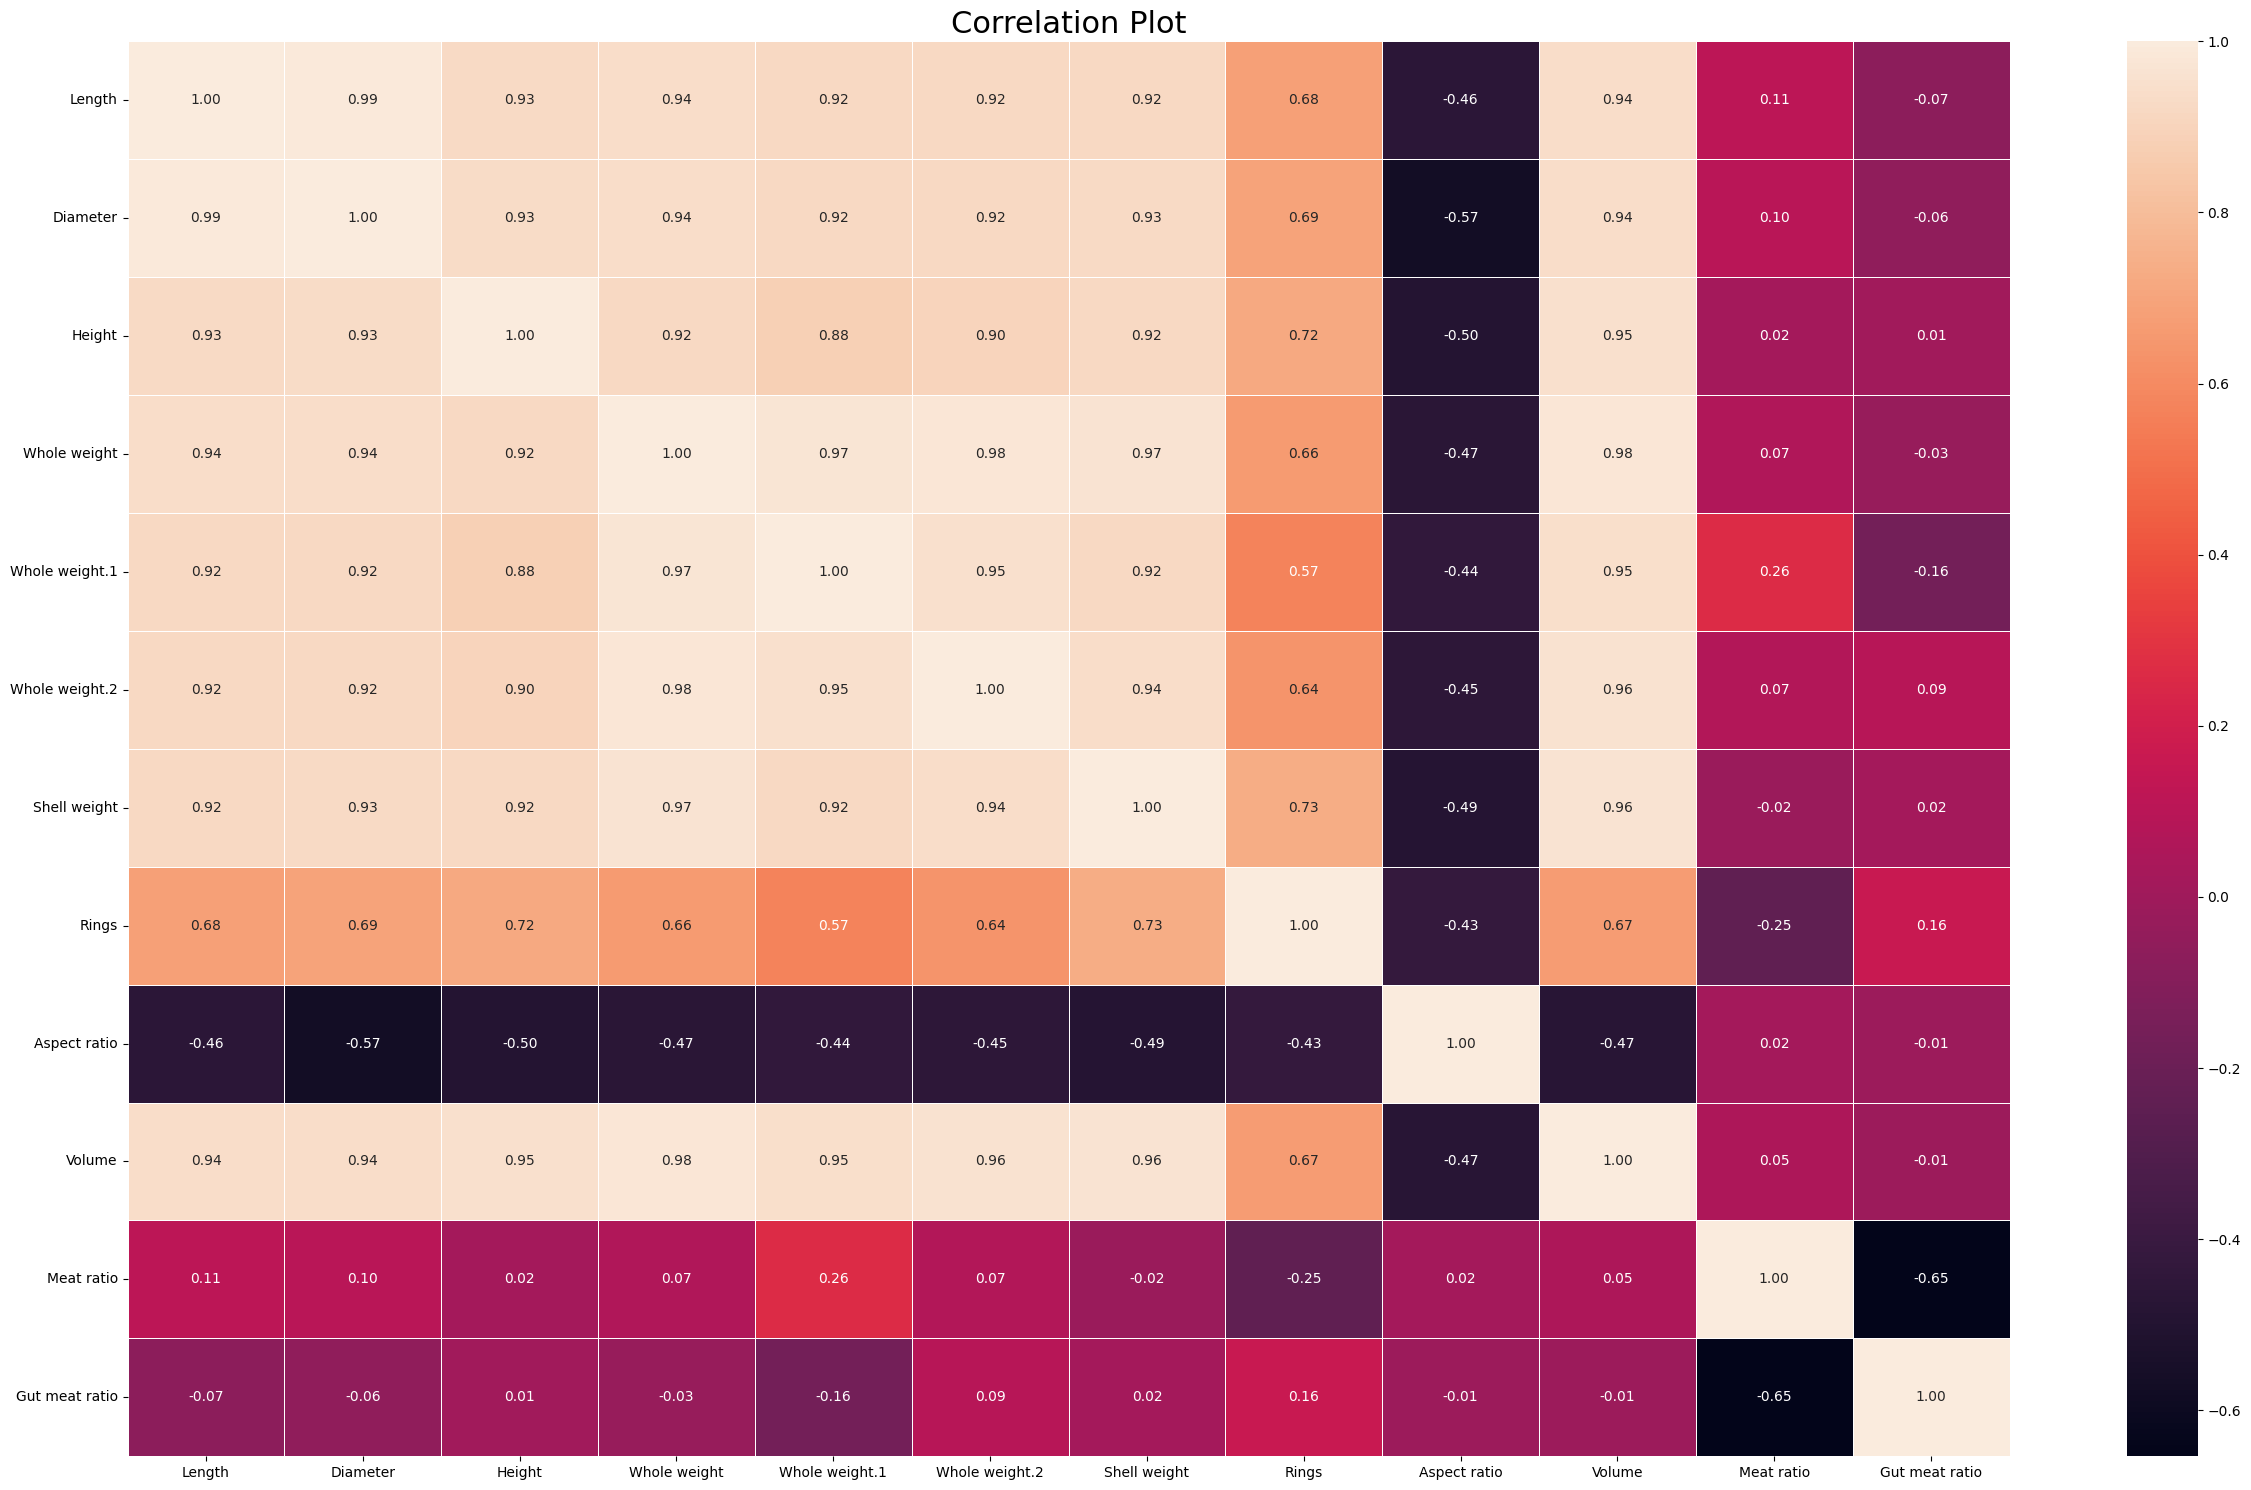

In [94]:
# Compute the correlation matrix
correlation_matrix = train_df[num_cols].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(25, 15))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidths=0.5)
plt.title('Correlation Plot', fontsize=22)  
plt.tight_layout()  
plt.show()

In [95]:
correlation_matrix

,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings,Aspect ratio,Volume,Meat ratio,Gut meat ratio
Length,1.000000,0.989795,0.927746,0.937902,0.920102,0.919245,0.920264,0.677886,-0.460329,0.936641,0.114083,-0.068803
Diameter,0.989795,1.000000,0.931219,0.940094,0.918820,0.920594,0.926830,0.690037,-0.573124,0.940743,0.098886,-0.059002
Height,0.927746,0.931219,1.000000,0.916449,0.878620,0.899606,0.920789,0.720673,-0.496905,0.950597,0.023586,0.005272
Whole weight,0.937902,0.940094,0.916449,1.000000,0.972889,0.975290,0.967451,0.662084,-0.467532,0.977026,0.066683,-0.033483
Whole weight.1,0.920102,0.918820,0.878620,0.972889,1.000000,0.952005,0.918181,0.568302,-0.439584,0.947541,0.258106,-0.163029
Whole weight.2,0.919245,0.920594,0.899606,0.975290,0.952005,1.000000,0.941272,0.637401,-0.453979,0.958380,0.070571,0.090587
Shell weight,0.920264,0.926830,0.920789,0.967451,0.918181,0.941272,1.000000,0.731547,-0.485933,0.963814,-0.017935,0.021343
Rings,0.677886,0.690037,0.720673,0.662084,0.568302,0.637401,0.731547,1.000000,-0.427316,0.668912,-0.245495,0.163603
Aspect ratio,-0.460329,-0.573124,-0.496905,-0.467532,-0.439584,-0.453979,-0.485933,-0.427316,1.000000,-0.474045,0.018542,-0.011135
Volume,0.936641,0.940743,0.950597,0.977026,0.947541,0.958380,0.963814,0.668912,-0.474045,1.000000,0.051991,-0.010280


6.3. Mutual information plot

c:\Users\Kai Qi Yan\anaconda3\envs\MLEnv\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\Kai Qi Yan\anaconda3\envs\MLEnv\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


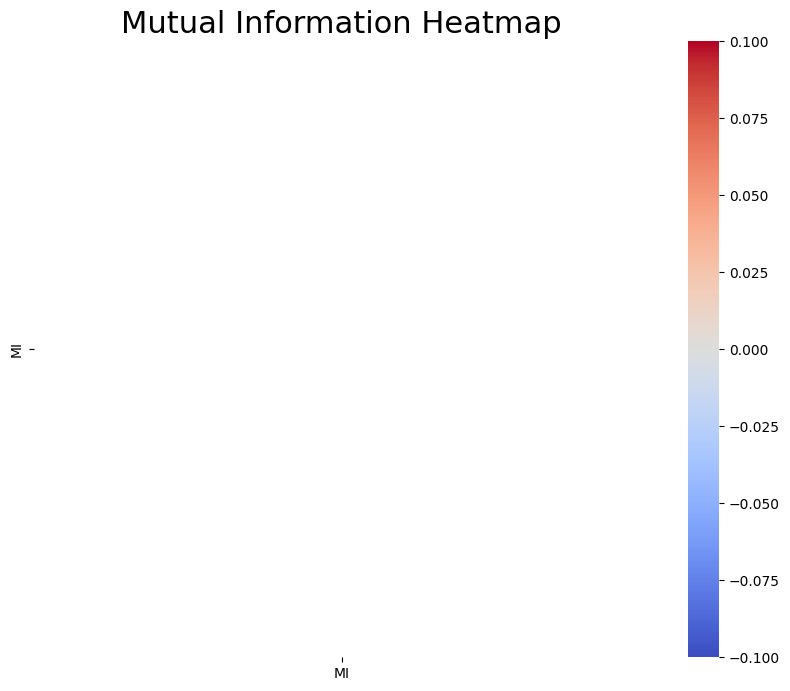

In [96]:
# Create Mutual Information plots

from sklearn.feature_selection import mutual_info_regression

# Define a function to calculate the mutual information
def calculate_mi(X, y):
    mi_scores = mutual_info_regression(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

def plot_mi_heatmap(mi_scores):
    # Convert the mutual information scores into a DataFrame
    mi_df = pd.DataFrame(mi_scores, columns=['MI'])
    
    # Create a correlation matrix
    corr_matrix = mi_df.corr()
    
    # Create a heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
    plt.title('Mutual Information Heatmap', fontsize=22)
    plt.show()

# Calculate the mutual information
X = train_df[num_cols].drop('Rings', axis=1)
y = train_df['Rings']
mi_scores = calculate_mi(X, y)

# Plot the mutual information heatmap
plot_mi_heatmap(mi_scores)


In [97]:
mi_scores 


Shell weight      0.672705
Volume            0.590306
Whole weight      0.572982
Height            0.549622
Whole weight.2    0.542968
Diameter          0.539911
Length            0.524948
Whole weight.1    0.510578
Aspect ratio      0.345237
Meat ratio        0.233644
Gut meat ratio    0.180377
Name: MI Scores, dtype: float64

######

abs(abs(MI)-abs(corr)) to deduce the probability of having non-linear relationship

######

7. Noramlization and Standardization

In [106]:
# Define a function to normalize the data

def NormalizeData(df):
    # Normalize the data
    df_norm = (df - df.mean()) / df.std()
    return df_norm

# define a function to standardize the data using Box-Cox transformation
def StandardizeData(df):    
    # Standardize the data using Box-Cox transformation
    df_std = df.copy()
    for col in num_cols:
        df_std[col] = boxcox(df_std[col] + 1)[0]
    return df_std


# Standardize the data
train_std = StandardizeData(train_df[num_cols])
train_std['Rings'] = train_df['Rings']
# Normalize the data
train_norm = NormalizeData(train_std[num_cols])
train_norm['Rings'] = train_std['Rings']
    

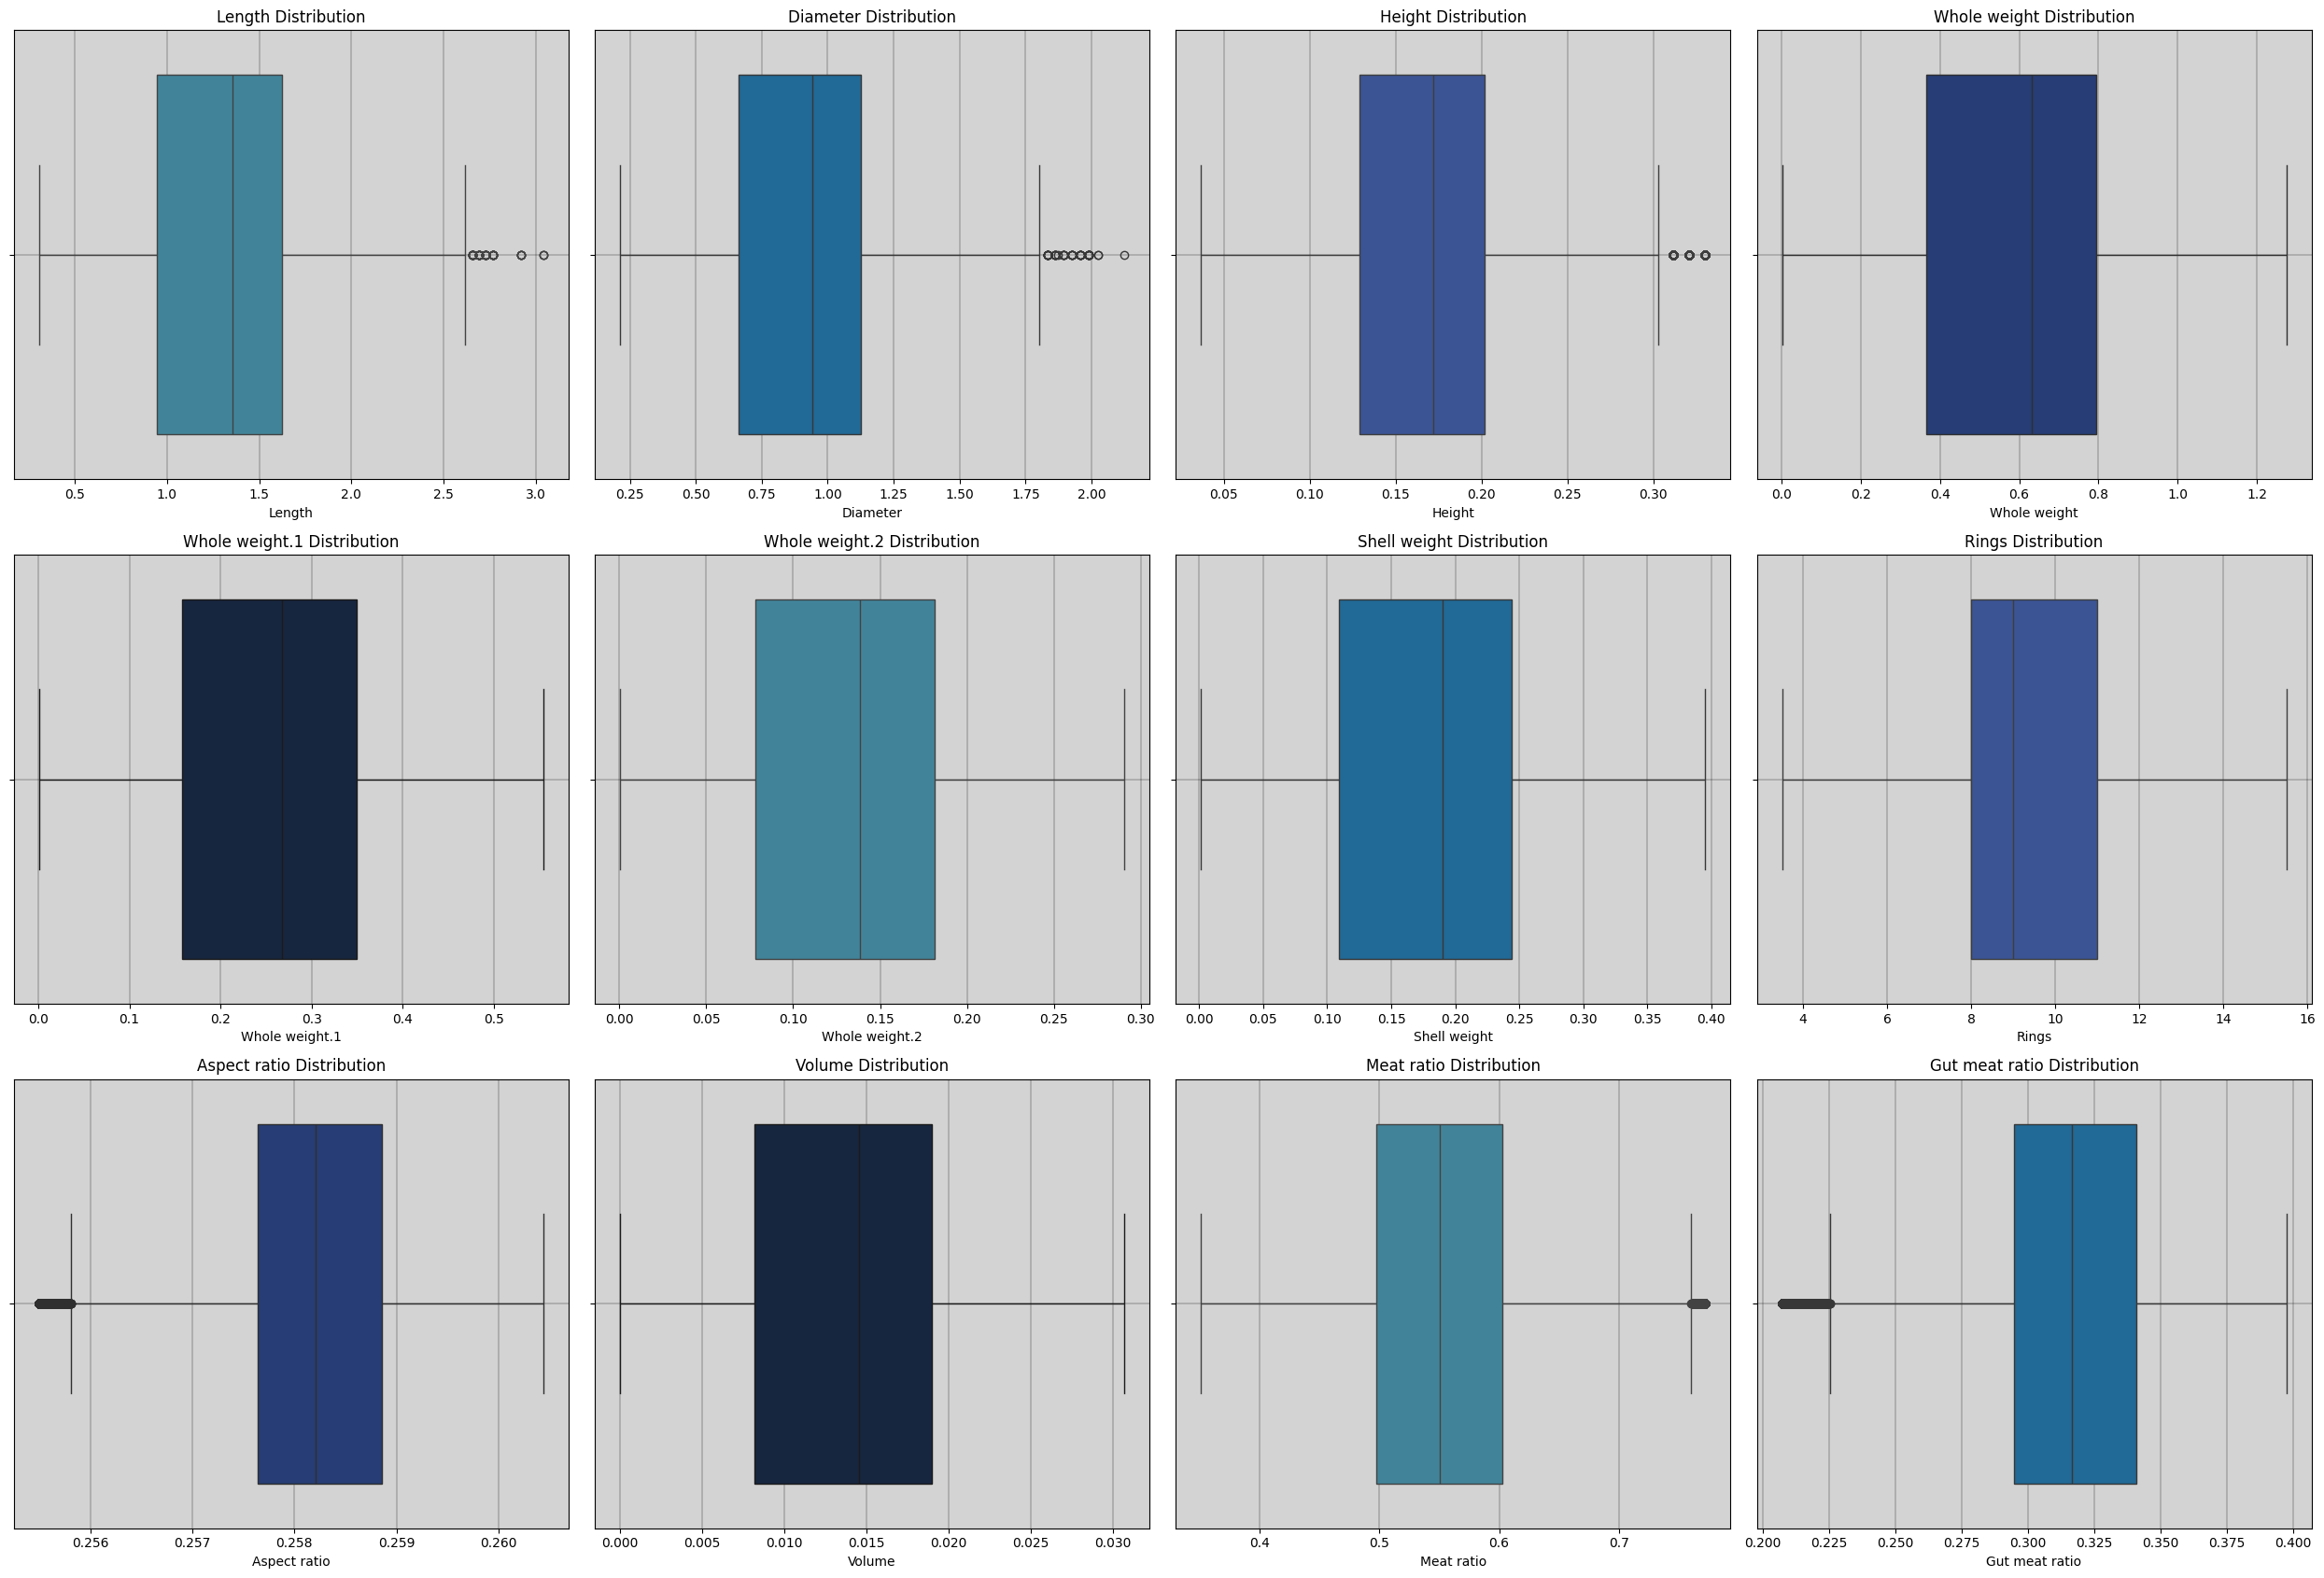

In [107]:
MultiBoxplot(df=train_std,num_cols=num_cols)

8. Encoding of categorial feature

9. Defining X and y for the model training

10. Preprocessing and model training

11. Correlation of the outputs from different models

12. Ensemble 

13. Hyperparameter tuning

14. Prediction